In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
#Column descriptions for reference
#id - unique identified for a house
#dateDate - house was sold
#pricePrice - is prediction target
#bedroomsNumber - of Bedrooms/House
#bathroomsNumber - of bathrooms/bedrooms
#sqft_livingsquare - footage of the home
#sqft_lotsquare - footage of the lot
#floorsTotal - floors (levels) in house
#waterfront - House which has a view to a waterfront
#view - Has been viewed/ how many times viewed?
#condition - How good the condition is ( Overall )
#grade - overall grade given to the housing unit, based on King County grading system
#sqft_above - square footage of house apart from basement
#sqft_basement - square footage of the basement
#yr_built - Built Year
#yr_renovated - Year when house was renovated
#zipcode - zip
#lat - Latitude coordinate
#long - Longitude coordinate
#sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
#sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [2]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Looking at the dataset ##

In [3]:
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [4]:
display(data.info())
display(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


None

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Dropping Values & Editing Columns##


#### Looking to see which will become my variables. First dropping any null data since it doesn't seem to affect the data frame. Then looking at other columns and seeing how they fit.####

In [5]:
data = data.dropna()
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819


In [6]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
id               15762 non-null int64
date             15762 non-null object
price            15762 non-null float64
bedrooms         15762 non-null int64
bathrooms        15762 non-null float64
sqft_living      15762 non-null int64
sqft_lot         15762 non-null int64
floors           15762 non-null float64
waterfront       15762 non-null float64
view             15762 non-null float64
condition        15762 non-null int64
grade            15762 non-null int64
sqft_above       15762 non-null int64
sqft_basement    15762 non-null object
yr_built         15762 non-null int64
yr_renovated     15762 non-null float64
zipcode          15762 non-null int64
lat              15762 non-null float64
long             15762 non-null float64
sqft_living15    15762 non-null int64
sqft_lot15       15762 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 2.6+ MB


In [7]:
#sorting by date
data = data.sort_values(by = 'date', ascending =False)
display(data.head())
display(data.tail())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4542,7201800300,9/9/2014,397500.0,3,1.75,1300,8480,1.0,0.0,0.0,...,7,1300,0.0,1969,0.0,98052,47.6991,-122.130,1740,7280
7888,5470100220,9/9/2014,222000.0,3,1.50,1310,9273,1.0,0.0,0.0,...,7,1310,0.0,1968,0.0,98042,47.3683,-122.147,1710,9600
14566,9528104910,9/9/2014,796000.0,4,3.25,2110,3000,2.0,0.0,0.0,...,8,2110,0.0,2001,0.0,98115,47.6769,-122.328,1780,4000
3240,7334501250,9/9/2014,325000.0,3,2.50,1870,9825,1.0,0.0,0.0,...,7,1250,620.0,1994,0.0,98045,47.4639,-121.744,1380,11475
13684,3343301490,9/9/2014,818500.0,5,3.50,4790,12957,2.0,0.0,1.0,...,9,3110,1680.0,2005,0.0,98006,47.5469,-122.194,2620,13538


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11028,1118001631,1/12/2015,1230000.0,3,2.25,2980,7700,1.0,0.0,0.0,...,9,2530,450.0,1964,0.0,98112,47.6336,-122.290,3020,8234
20699,1982201596,1/12/2015,540000.0,3,1.75,1630,1404,2.0,0.0,0.0,...,8,1020,610.0,2014,0.0,98107,47.6646,-122.367,1420,1670
11086,3816300105,1/12/2015,435000.0,4,2.50,2060,10125,2.0,0.0,0.0,...,7,1560,500.0,1979,0.0,98028,47.7640,-122.262,1760,9876
18679,424069206,1/12/2015,835000.0,4,2.50,2950,48351,2.0,0.0,0.0,...,10,2950,0.0,1986,0.0,98075,47.5938,-122.048,2870,34417
12076,5437600140,1/10/2015,325000.0,4,2.50,2240,5105,2.0,0.0,0.0,...,8,2240,0.0,2002,0.0,98042,47.3922,-122.165,1920,5288


In [8]:
data['date'] = pd.to_datetime(data['date'])

In [10]:
for column in data:
    unique_vals = np.unique(data[column])
    num_values = len(unique_vals)
    if num_values < 20:
        print('The number of values for feature {} :{} -- {}'.format(column, num_values, unique_vals))
    else:
        print('The number of values for feature {} : {}'.format(column, num_values))

The number of values for feature id : 15676
The number of values for feature date : 369
The number of values for feature price : 3034
The number of values for feature bedrooms :12 -- [ 1  2  3  4  5  6  7  8  9 10 11 33]
The number of values for feature bathrooms : 27
The number of values for feature sqft_living : 912
The number of values for feature sqft_lot : 7927
The number of values for feature floors :6 -- [1.  1.5 2.  2.5 3.  3.5]
The number of values for feature waterfront :2 -- [0. 1.]
The number of values for feature view :5 -- [0. 1. 2. 3. 4.]
The number of values for feature condition :5 -- [1 2 3 4 5]
The number of values for feature grade :11 -- [ 3  4  5  6  7  8  9 10 11 12 13]
The number of values for feature sqft_above : 835
The number of values for feature sqft_basement : 283
The number of values for feature yr_built : 116
The number of values for feature yr_renovated : 70
The number of values for feature zipcode : 70
The number of values for feature lat : 4747
The nu

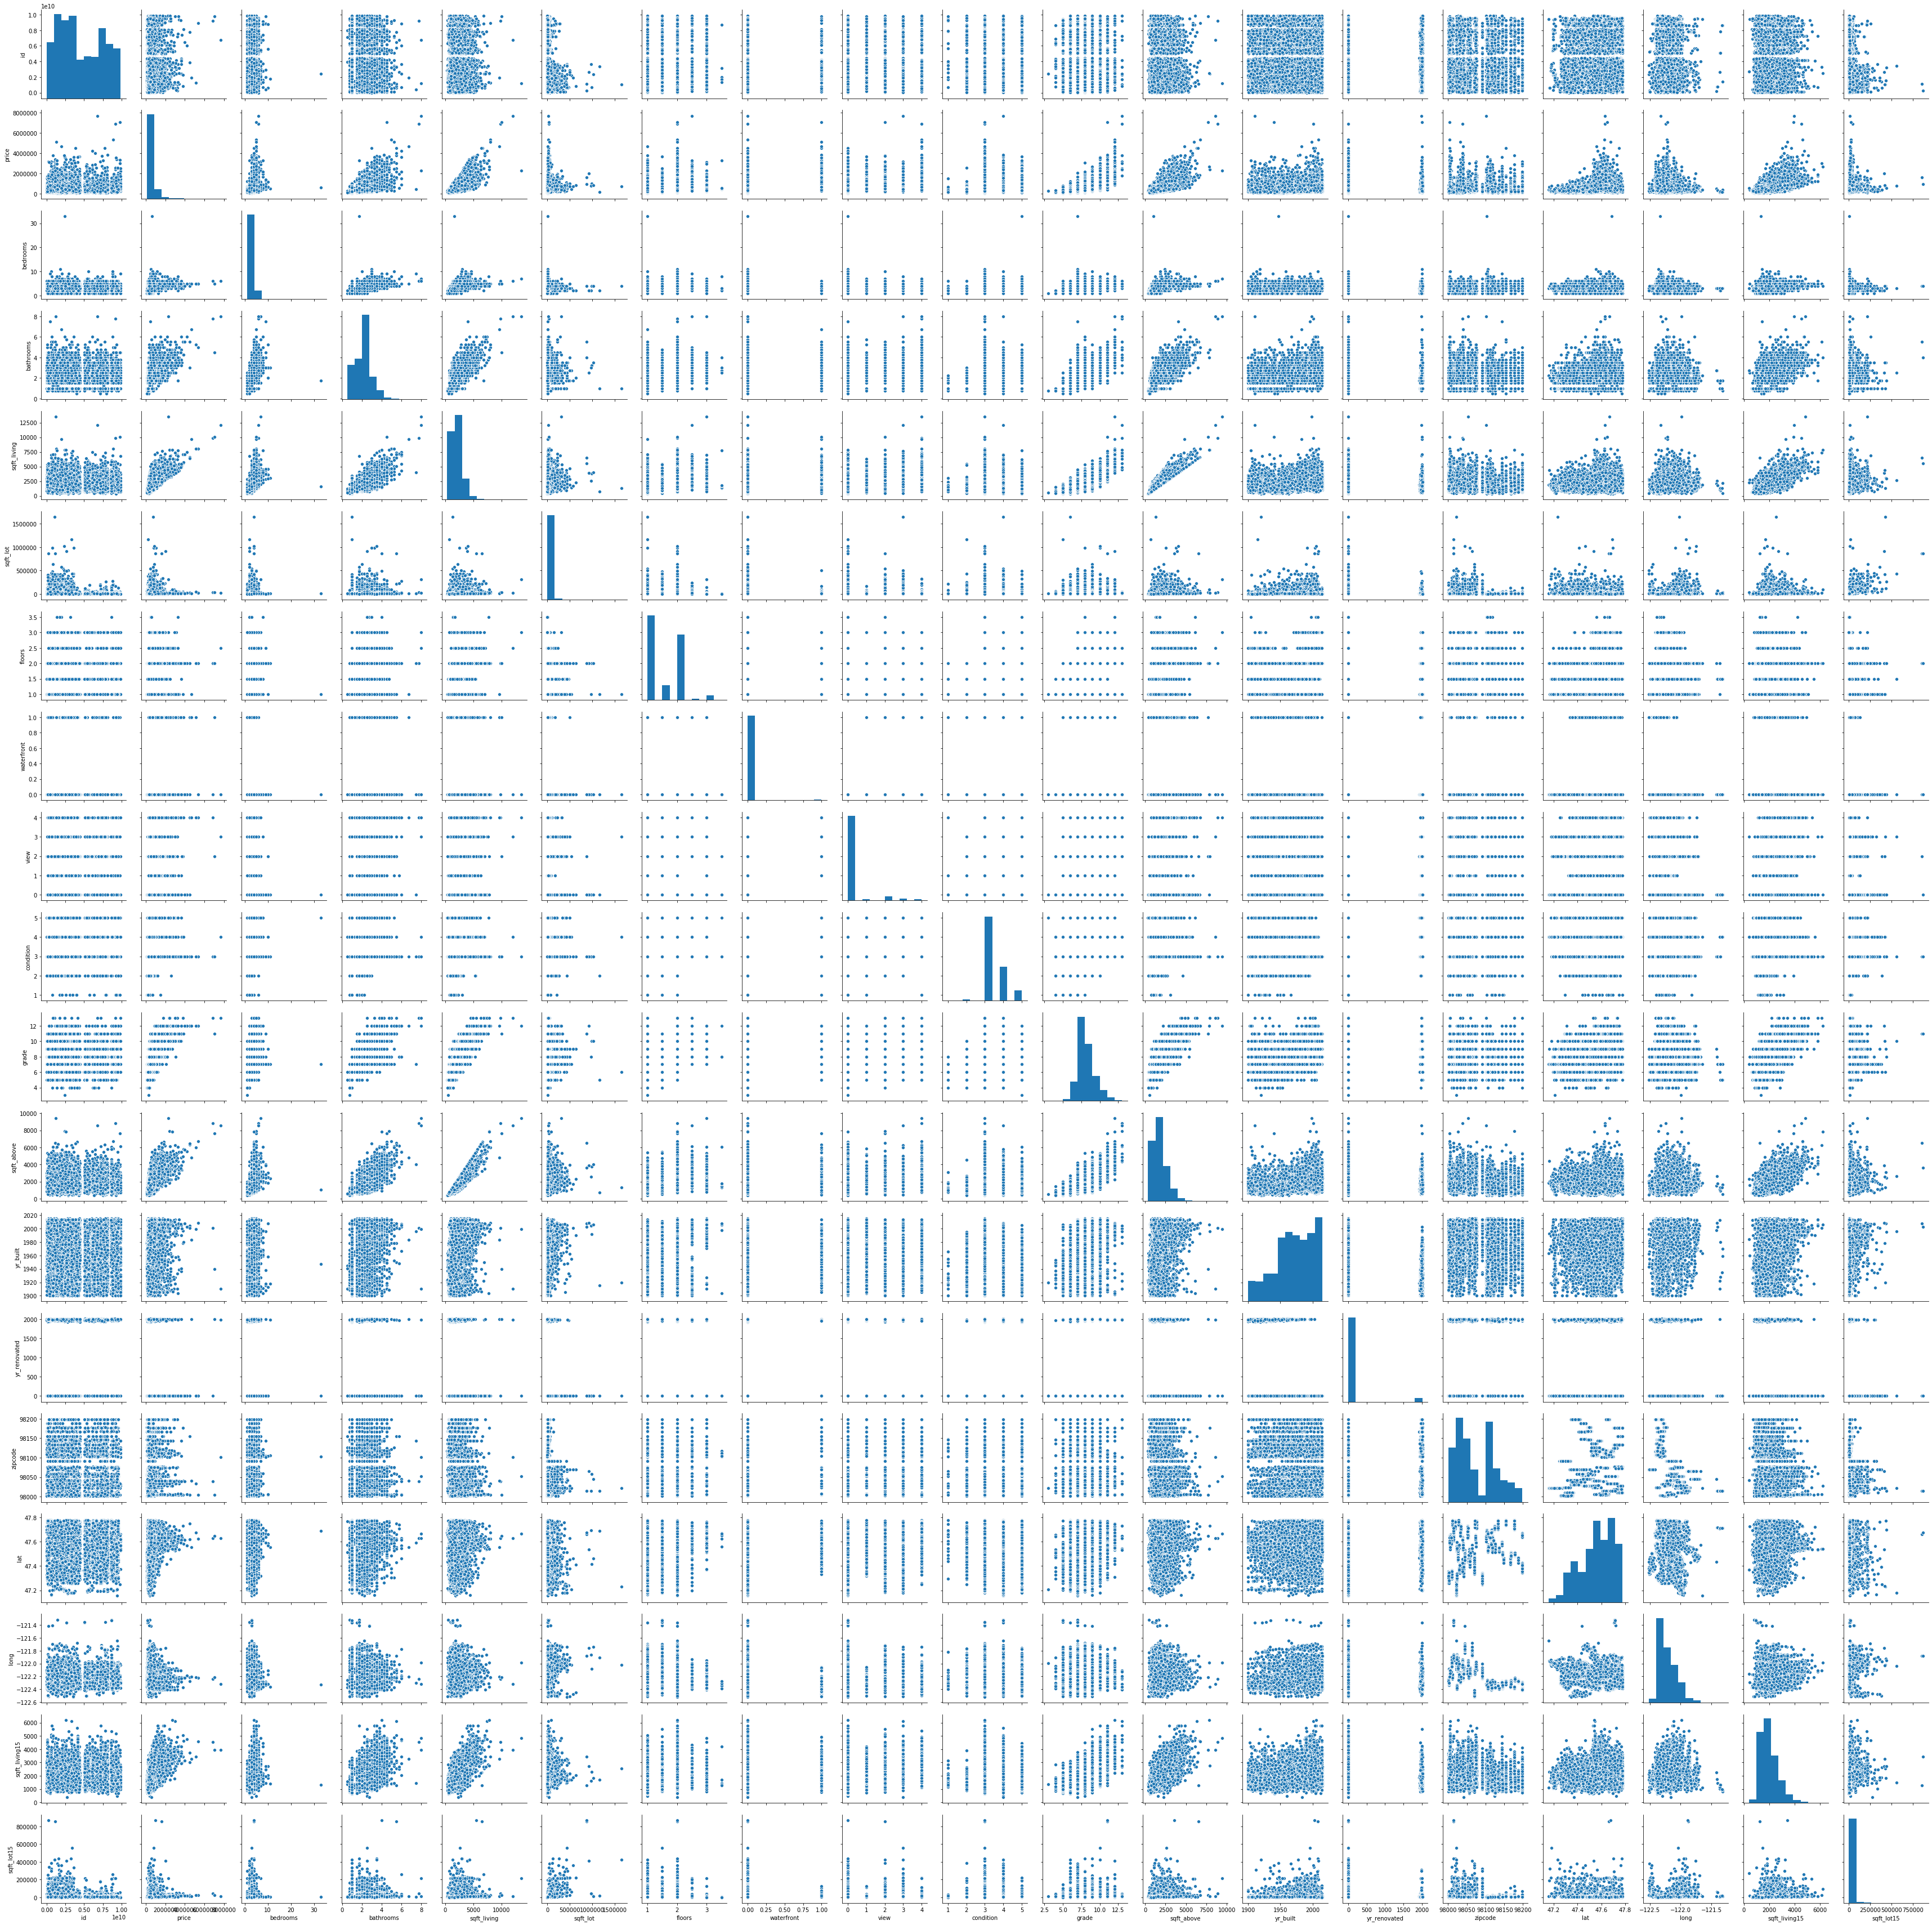

In [10]:
p = sns.pairplot(data)

In [11]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [12]:
data.nunique()

id               15676
date               369
price             3034
bedrooms            12
bathrooms           27
sqft_living        912
sqft_lot          7927
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         835
sqft_basement      283
yr_built           116
yr_renovated        70
zipcode             70
lat               4747
long               728
sqft_living15      694
sqft_lot15        7126
dtype: int64

In [ ]:
## saving zipcode, lat, and long into a seperate dataframe for later

In [13]:
location = data[['price', 'bedrooms', 'bathrooms', 'zipcode', 'lat', 'long']]
location.head()

,price,bedrooms,bathrooms,zipcode,lat,long
4542,397500.0,3,1.75,98052,47.6991,-122.130
7888,222000.0,3,1.50,98042,47.3683,-122.147
14566,796000.0,4,3.25,98115,47.6769,-122.328
3240,325000.0,3,2.50,98045,47.4639,-121.744
13684,818500.0,5,3.50,98006,47.5469,-122.194


In [14]:
location.to_csv('location.csv', index = False)

## Normalizing

In [12]:
def norm_feat(series):
    return(series-series.mean())/series.std()
for feat in ['bathrooms', 'sqft_living', 'condition', 'yr_built', 'zipcode']:
    data[feat] = norm_feat(data[feat])
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.576200e+04,1.576200e+04,15762.000000,1.576200e+04,1.576200e+04,1.576200e+04,15762.000000,15762.000000,15762.000000,1.576200e+04,15762.000000,15762.000000,1.576200e+04,15762.000000,1.576200e+04,15762.000000,15762.000000,15762.000000,15762.000000
mean,4.593364e+09,5.413172e+05,3.378949,1.622861e-17,1.081907e-17,1.528082e+04,1.495147,0.007613,0.229984,-5.770173e-17,7.663748,1792.775473,2.344133e-17,82.440236,1.667941e-17,47.559177,-122.213520,1990.219579,12900.415556
std,2.876078e+09,3.722258e+05,0.935301,1.000000e+00,1.000000e+00,4.182288e+04,0.539352,0.086924,0.761324,1.000000e+00,1.172238,828.403502,1.000000e+00,397.212626,1.000000e+00,0.138629,0.140706,684.142495,27977.230059
min,1.000102e+06,8.200000e+04,1.000000,-2.113793e+00,-1.866405e+00,5.200000e+02,1.000000,0.000000,0.000000,-3.697862e+00,3.000000,370.000000,-2.423958e+00,0.000000,-1.433275e+00,47.155900,-122.519000,399.000000,659.000000
25%,2.125159e+09,3.210000e+05,3.000000,-4.835819e-01,-7.124970e-01,5.048500e+03,1.000000,0.000000,0.000000,-6.301936e-01,7.000000,1200.000000,-6.514413e-01,0.000000,-8.341911e-01,47.469200,-122.328000,1490.000000,5100.000000
50%,3.905081e+09,4.500000e+05,3.000000,1.685028e-01,-1.790869e-01,7.602000e+03,1.500000,0.000000,0.000000,-6.301936e-01,7.000000,1570.000000,1.325564e-01,0.000000,-2.351074e-01,47.571000,-122.229000,1846.000000,7620.000000
75%,7.334501e+09,6.448750e+05,4.000000,4.945451e-01,5.067262e-01,1.072000e+04,2.000000,0.000000,0.000000,9.036408e-01,8.000000,2220.000000,8.824672e-01,0.000000,7.384036e-01,47.677400,-122.124000,2370.000000,10107.500000
max,9.895000e+09,7.700000e+06,33.000000,7.667476e+00,1.247035e+01,1.651359e+06,3.500000,1.000000,4.000000,2.437475e+00,13.000000,9410.000000,1.496031e+00,2015.000000,2.273556e+00,47.777600,-121.315000,6210.000000,871200.000000


In [51]:
data_bed_bath.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1748 entries, 4887 to 1166
Data columns (total 8 columns):
date           1748 non-null datetime64[ns]
price          1748 non-null float64
bedrooms       1748 non-null int64
bathrooms      1748 non-null float64
sqft_living    1748 non-null float64
condition      1748 non-null float64
yr_built       1748 non-null float64
zipcode        1748 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 202.9 KB


In [52]:
data_bed_bath.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'condition',
       'yr_built', 'zipcode'],
      dtype='object')

In [49]:
data_bed_bath.to_csv('data_2bed.csv', index = False) 

In [30]:
feats = ['date', 'price','bedrooms', 'bathrooms', 'sqft_living', 'condition', 'yr_built', 'zipcode']
data_bed_bath = data_bed_bath[feats]
data_bed_bath1 = pd.get_dummies(data_bed_bath, drop_first = True)
data_bed_bath.head()

,date,price,bedrooms,bathrooms,sqft_living,condition,yr_built,zipcode
4887,2014-08-20,952000.0,2,1.371358,6.166172,-0.594771,1.051364,-2.163141
19157,2015-03-04,890000.0,2,1.371358,4.997628,-0.594771,1.432669,-1.163647
14688,2014-09-15,570000.0,2,1.371358,4.519587,0.855243,1.536661,-1.716559
3916,2014-08-11,575000.0,2,1.371358,4.254009,-0.594771,1.155356,1.473316
4555,2015-03-30,1260000.0,2,0.691127,4.068104,-0.594771,-1.375120,0.176100


In [54]:
data = pd.read_csv('data_2bed.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,condition,yr_built,zipcode
0,2014-08-20,952000.0,NaN,1.371358,6.166172,-0.594771,1.051364,-2.163141
1,2015-03-04,890000.0,NaN,1.371358,4.997628,-0.594771,1.432669,-1.163647
2,2014-09-15,570000.0,NaN,1.371358,4.519587,0.855243,1.536661,-1.716559
3,2014-08-11,575000.0,NaN,1.371358,4.254009,-0.594771,1.155356,1.473316
4,2015-03-30,1260000.0,NaN,0.691127,4.068104,-0.594771,-1.375120,0.176100


In [55]:
# I know all bedrooms are 2 bedrooms so going to replace NaN with 2's 
data['bedrooms'].fillna('2', inplace = True)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,condition,yr_built,zipcode
0,2014-08-20,952000.0,2,1.371358,6.166172,-0.594771,1.051364,-2.163141
1,2015-03-04,890000.0,2,1.371358,4.997628,-0.594771,1.432669,-1.163647
2,2014-09-15,570000.0,2,1.371358,4.519587,0.855243,1.536661,-1.716559
3,2014-08-11,575000.0,2,1.371358,4.254009,-0.594771,1.155356,1.473316
4,2015-03-30,1260000.0,2,0.691127,4.068104,-0.594771,-1.375120,0.176100


In [56]:
data.describe()

,price,bathrooms,sqft_living,condition,yr_built,zipcode
count,1.748000e+03,1.748000e+03,1.748000e+03,1.748000e+03,1.748000e+03,1.748000e+03
mean,3.819078e+05,-3.251912e-17,1.300765e-16,-1.219467e-16,2.422674e-15,3.755145e-14
std,1.639594e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,8.250000e+04,-2.029796e+00,-1.933962e+00,-3.494801e+00,-1.721761e+00,-2.269470e+00
25%,2.600000e+05,-6.693346e-01,-7.654181e-01,-5.947715e-01,-7.858310e-01,-7.170648e-01
50%,3.600000e+05,-6.693346e-01,-2.077040e-01,-5.947715e-01,-9.254986e-02,1.761001e-01
75%,4.701125e+05,6.911269e-01,5.093570e-01,8.552432e-01,3.580829e-01,5.376192e-01
max,1.410000e+06,2.051588e+00,6.166172e+00,2.305258e+00,2.229942e+00,1.941164e+00


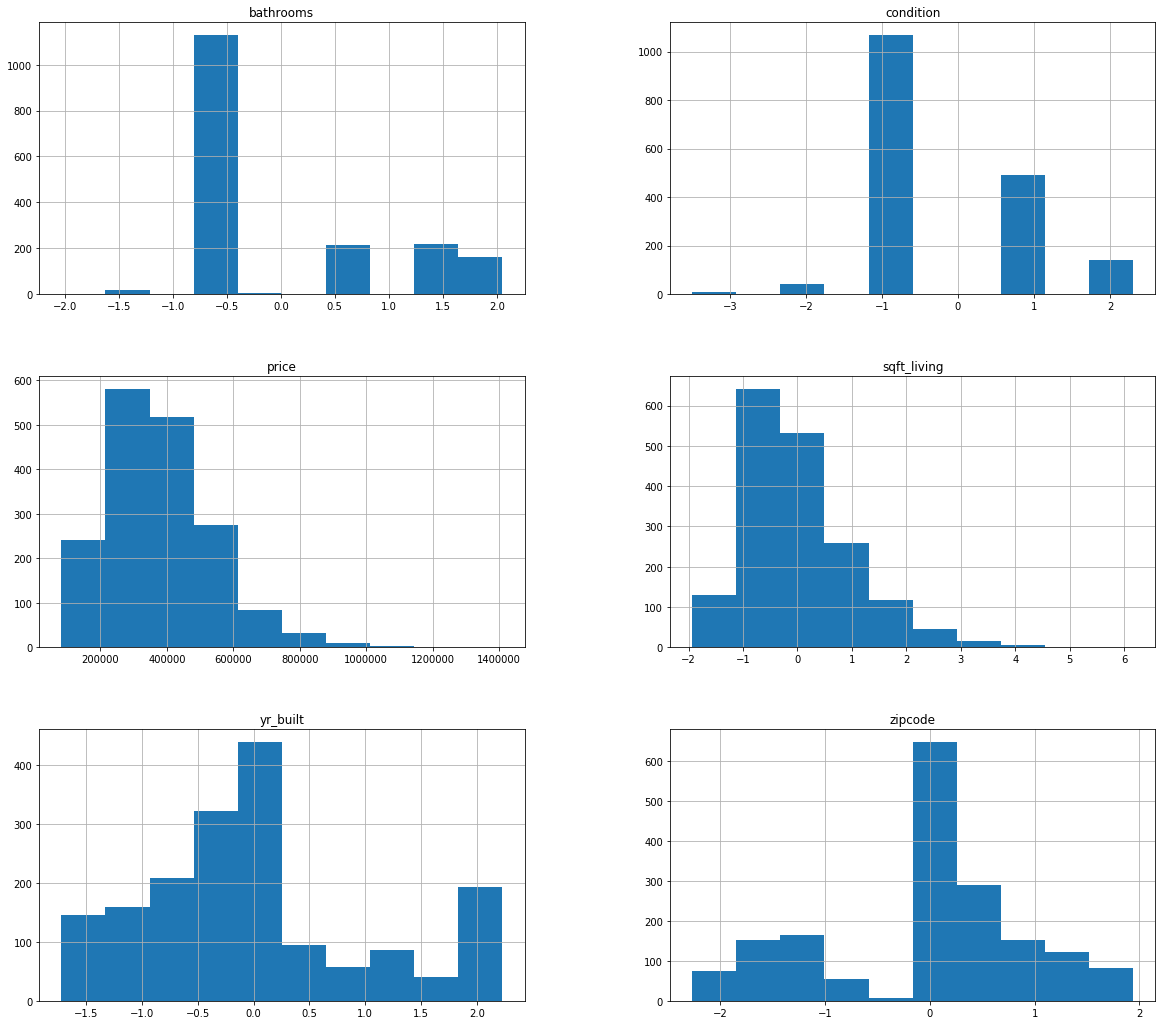

In [57]:
data.hist(figsize = (20,18));

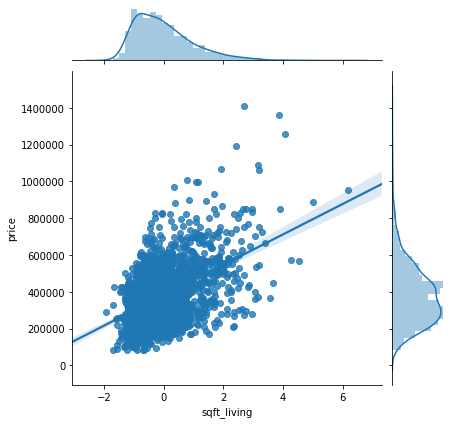

In [58]:
sns.jointplot('sqft_living','price', data=data, kind='reg');

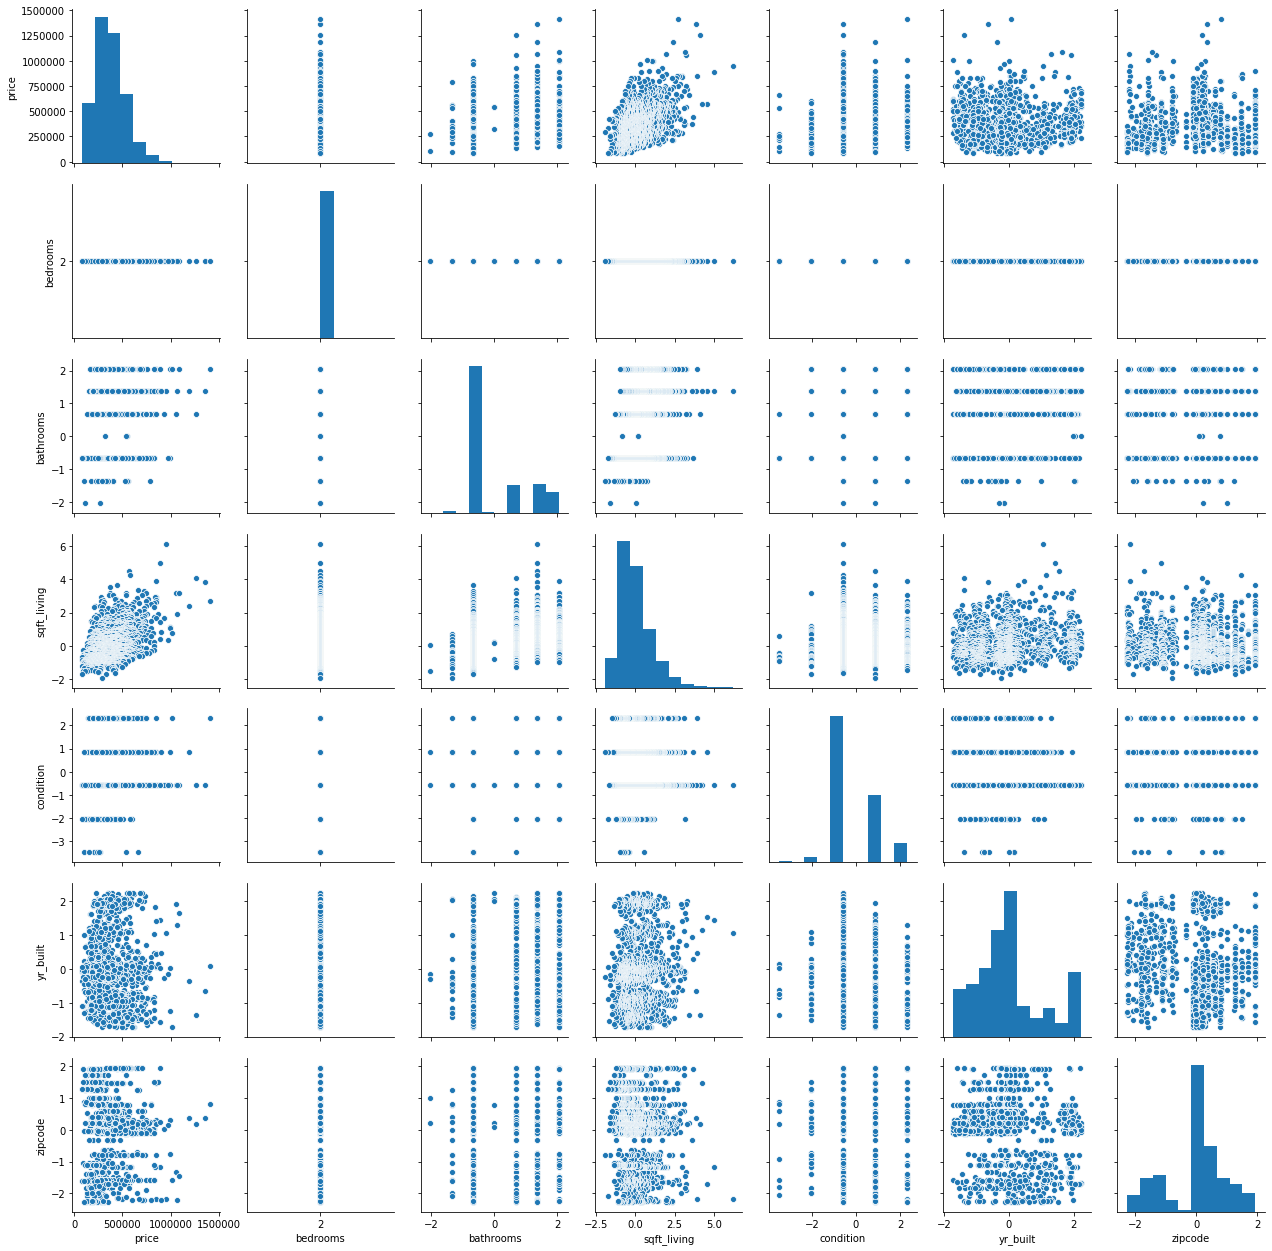

In [59]:
sns.pairplot(data)

In [43]:
feats = ['bathrooms', 'sqft_living', 'condition','zipcode','yr_built']
corr = data[feats].corr()
corr

,bathrooms,sqft_living,condition,zipcode,yr_built
bathrooms,1.000000,0.497369,-0.034166,-0.143720,0.416276
sqft_living,0.497369,1.000000,0.020925,-0.109143,0.145647
condition,-0.034166,0.020925,1.000000,-0.052698,-0.242522
zipcode,-0.143720,-0.109143,-0.052698,1.000000,-0.199079
yr_built,0.416276,0.145647,-0.242522,-0.199079,1.000000


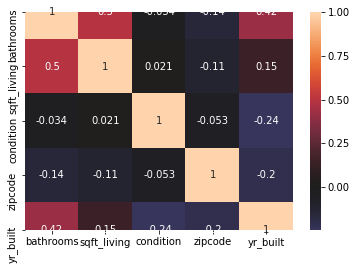

In [44]:
sns.heatmap(corr, center =0, annot= True)

In [45]:
# sqft_living shows a fairly high correlation